In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

tf.__version__

'2.3.1'

### Tensorflow/Keras LSTM 

https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN

In [ ]:
import sys
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

#### Data Preprocessiog

In [3]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = df_train.iloc[:, 1:2].values # Opening Price

# Scale Features

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(1258, 1)

In [5]:
# Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape,y_train.shape

((1198, 60), (1198,))

In [6]:
# Reshape to 3d array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1198, 60, 1)

In [7]:
X_train[0,:,0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

#### Build the RNN

In [8]:
#  Sequential Model
model = Sequential()

# Add four LSTM layers with Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

#### Compile the RNN

In [9]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

#### Fit the RNN to the Training set

In [11]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0463
Epoch 2/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0041
Epoch 13/100
38/38 [==

#### Predict stack price

In [12]:
# Get the real stock price of 2017

real_stock_price = df_test.iloc[:, 1:2].values

In [13]:
# Getting the predicted stock price of 2017
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### Visual the results

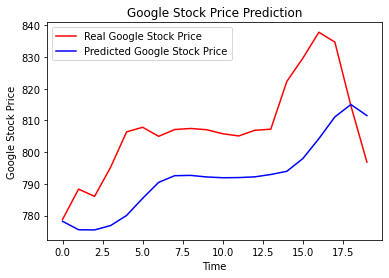

In [14]:

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend();
